In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('processed.cleveland.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [11]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [14]:
len(df.loc[(df['ca'] == '?')
          |
          (df['thal'] == '?')])

6

In [15]:
df.loc[(df['ca'] == '?')
          |
          (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [16]:
len(df)

303

In [22]:
df_no_missing = df.loc[(df['ca'] != '?')
          &
          (df['thal'] != '?')]

In [23]:
len(df_no_missing)

297

In [24]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [25]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [26]:
X = df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [27]:
y = df_no_missing.iloc[:,-1]
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# One-Hot Encoding
Two Methods
- ColumnsTransformer() from scikit-learn
-  get_dummies from pandas

In [28]:
X['cp'].unique()  #use unique to check that columns
                  #only contain valid categories

array([1., 4., 3., 2.])

In [29]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                      'restecg',
                                      'slope',
                                      'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [30]:
y.unique()

array([0, 2, 1, 3, 4])

In [31]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

/tmp/ipykernel_1902/300782712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_index] = 1


array([0, 1])

# Preliminary Classification Tree

In [34]:
X_train,X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

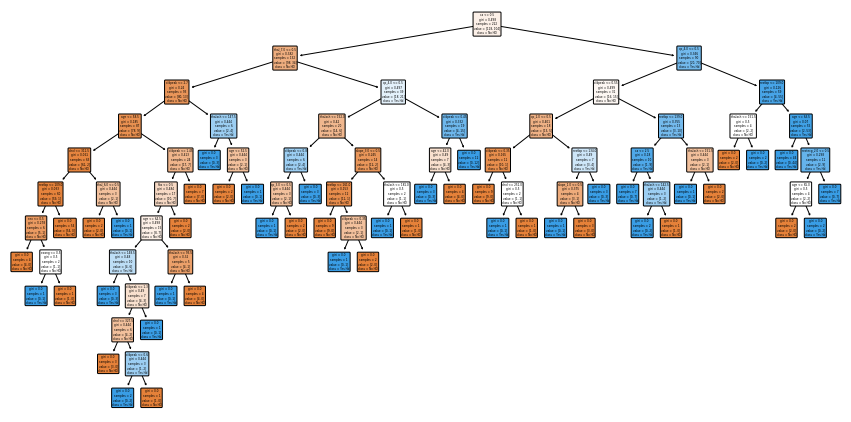

In [36]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Yes Hd'],
         feature_names=X_encoded.columns);

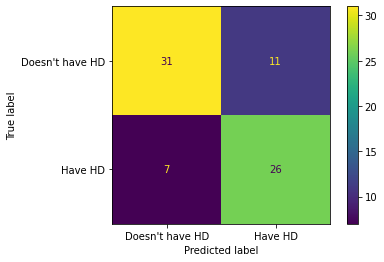

In [38]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Doesn't have HD", "Have HD"])

# Pruning the tree to make model more accurate and dealing with overfitting

In [40]:
#Cost Complexity Pruning Part 1: Visualize alpha

In [41]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

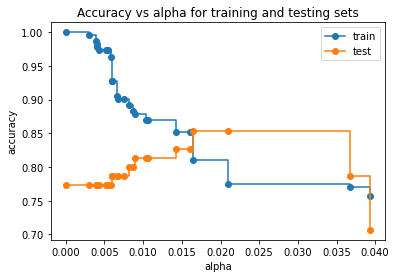

In [45]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train',drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

# Cost Complexity Pruning Part 2: Cross Validation for Finding the Best Alpha

<AxesSubplot:xlabel='tree'>

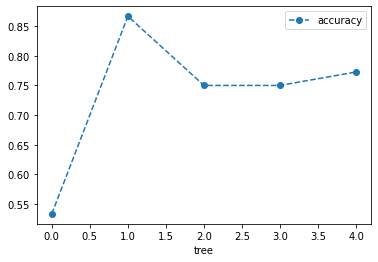

In [47]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

#5 fold CV
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data = {'tree' : range(5), 'accuracy' : scores})

df.plot(x = 'tree',y= 'accuracy', marker = 'o' , linestyle ='--')

<AxesSubplot:xlabel='alpha'>

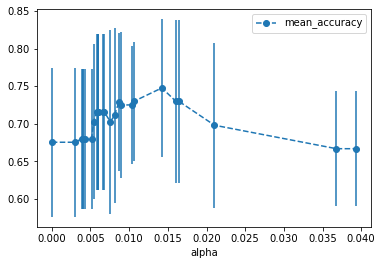

In [50]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha','mean_accuracy','std'])
    
alpha_results.plot(x='alpha', y='mean_accuracy',yerr='std', marker='o',linestyle='--')
    

In [51]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [56]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)] &(alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha       

SyntaxError: unmatched ']' (1420955994.py, line 1)